<a href="https://colab.research.google.com/github/SarahFeanor/Portfolio-DataScience/blob/main/C%C3%B3pia_de_Modelo_Para_Prever_Pre%C3%A7os_De_Casas_RegressaoLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<sub> **Projeto | Regressão Linear | Por Sarah Faria Rezende** </sub>

---

# **Previsão de Preços de Imóveis em _Belo Horizonte_ - Utilizando Regressão Linear**

Explorando Previsões de Preços Imobiliários em Belo Horizonte com Regressão Linear. Este projeto analisa dados de propriedades na cidade, aplicando técnicas de regressão linear para prever valores de imóveis. Combinando análise estatística e insights geográficos, busca-se compreender melhor o mercado imobiliário da região.

# ***Belo Horizonte*** - **Minas Gerais, Brasil** 🏠

Belo Horizonte, capital de Minas Gerais, Brasil, é uma cidade que combina tradição e modernidade. Conhecida por sua arquitetura marcante projetada por Oscar Niemeyer, a cidade encanta com suas praças arborizadas, culinária diversificada e vida cultural vibrante. Com uma população diversa e acolhedora, Belo Horizonte oferece uma mistura única de atrações históricas e contemporâneas. Seu clima tropical de altitude proporciona verões quentes e úmidos, enquanto seus invernos mais amenos convidam a explorar suas belezas naturais. A cidade é um verdadeiro reflexo da cultura mineira, caracterizada por sua hospitalidade e riqueza cultural.

A cidade proporciona uma diversidade de opções de moradia, desde bairros mais tradicionais até regiões modernas e cosmopolitas. Com uma infraestrutura bem desenvolvida, é possível encontrar apartamentos e casas em ambientes arborizados, próximos a praças e serviços essenciais. A cultura acolhedora dos mineiros se reflete na atmosfera tranquila da cidade, combinada com uma cena gastronômica rica e variada.

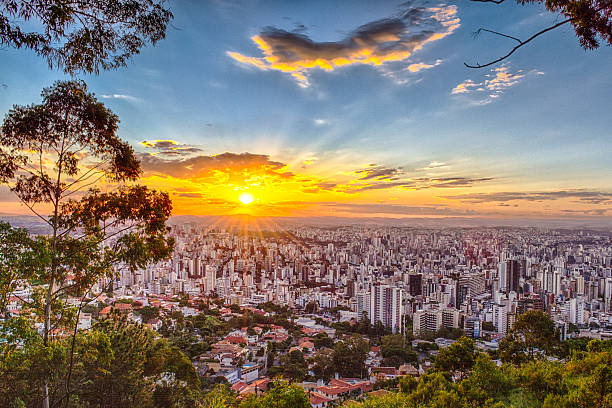

# 📂 **Conjunto de Dados**

Este conjunto de dados abrange cerca de 6000 propriedades listadas em um site imobiliário brasileiro, representando casas e apartamentos em Belo Horizonte, Minas Gerais, Brasil.

Extraídos em novembro de 2021, os dados foram pré-processados para remover informações inválidas e duplicadas. As informações incluem tamanho da propriedade, bairro, preço, custos agregados e coordenadas geográficas. Os registros podem não conter números de casa, mas sempre apresentam nomes de ruas/avenidas. O conjunto é valioso para identificar oportunidades de custo-benefício e analisar a qualidade de vida nos bairros, bem como explorar análises geográficas.

* Os dados estão acessíveis na plataforma ***Kaggle*** >> [dataset](https://www.kaggle.com/datasets/guilherme26/house-pricing-in-belo-horizonte).


In [ ]:
# >> IMPORTANDO PACOTES NECESSÁRIOS <<

# Banco de dados
import pandas as pd #manipulação de banco de dados tipo DataFrame

# Manipulações Algébricas
import numpy as np
from numpy import arange

# Visualização de dados
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as py
import missingno
import folium
import seaborn as sns

# Regressão
from sklearn.linear_model import Lasso, LassoCV # Modelo de regressão Lasso
from sklearn.model_selection import train_test_split # Separar variáveis
from sklearn.preprocessing import StandardScaler # Transformador de colunas
from sklearn.linear_model import Ridge, RidgeCV # Modelo de regressão Ridge
from sklearn.linear_model import ElasticNet, ElasticNetCV # Modelo de regressão ElasticNet
from sklearn.model_selection import cross_val_score # Score dos modelos


# Indicadores de Regressão
from sklearn.metrics import mean_squared_error #Indicador de regressão RMSE
from sklearn.metrics import r2_score #Indicador de Regressão Coeficiente de Determinação
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif #Indicador fator de inflação da variância (VIF)

%matplotlib inline

%matplotlib inline
# tamanho do gráficos
plt.rcParams["figure.figsize"] = [10,5]
# tamanho dos dados
plt.rcParams["font.size"] = 12

In [ ]:
# importar o arquivo csv para um DataFrame
df = pd.read_csv("/content/data.csv")

## **Análise dos Dados**

O objetivo desta fase é estabelecer uma compreensão inicial da situação e obter uma visão da estrutura dos dados.

### **Dicionário das variáveis**

* `Address` - Endereço real da propriedade
*` Adm-fees` - Taxas relacionadas com a manutenção do condomínio
*` Garage-places` - Vagas de garagem
* `Price` - O preço da propriedade
* `Rooms `- Número de quartos na propriedade
* `Square-foot` - Metragem quadrada da propriedade
* `Neighbourhood` - Bairro onde está localizado o imóvel
* `City` - Cidade
* `Latitude` - coordenada da latitude da propriedade
* `Longitude` - coordenada da longitude da propriedade





# **1 - Quantos atributos (variáveis) e entradas compõem nosso conjunto de dados? Quais são os tipos das variáveis presentes?**

Iremos analisar o número de registros presentes em nosso conjunto de dados, bem como examinaremos as categorias presentes em cada coluna.

In [ ]:
print("Entradas: ", df[df.columns[0]].count())
print("Variáveis: ", df.shape[1])

Entradas:  5981
Variáveis:  10


In [ ]:
# verificar as 5 primeiras entradas do dataset
df.head()

,endereco,taxa_condominio,vaga_garagem,preco,quartos,area,bairro,cidade,latitude,longitude
0,"Avenida Raja Gabaglia, 1583",470.0,1,330000.0,1,40,Luxemburgo,Belo Horizonte,-19.936415,-43.953396
1,"Rua Espírito Santo, 1171",NaN,1,480000.0,2,45-65,Centro,Belo Horizonte,-18.864776,-41.121777
2,"Rua dos Expedicionários, 1082",NaN,5,1190000.0,4,411,Santa Amélia,Belo Horizonte,-20.225241,-44.397780
3,"Rua Marechal Hermes, 81",750.0,4,1590000.0,4,158,Gutierrez,Belo Horizonte,-19.937155,-43.958694
4,"Rua Juruna, 110",NaN,6,550000.0,3,278,Pindorama,Belo Horizonte,-19.912982,-44.019944


In [ ]:
# Mudando os nomes para facil declaração no futuro
df = df.rename(columns={'address': 'endereco', 'adm-fees': 'condominio', 'garage-places': 'vaga_garagem', 'price': 'preco', 'rooms': 'quartos', 'square-foot':'area', 'neighborhood': 'bairro', 'city': 'cidade'})
df.head()

,endereco,taxa_condominio,vaga_garagem,preco,quartos,area,bairro,cidade,latitude,longitude
0,"Avenida Raja Gabaglia, 1583",470.0,1,330000.0,1,40,Luxemburgo,Belo Horizonte,-19.936415,-43.953396
1,"Rua Espírito Santo, 1171",NaN,1,480000.0,2,45-65,Centro,Belo Horizonte,-18.864776,-41.121777
2,"Rua dos Expedicionários, 1082",NaN,5,1190000.0,4,411,Santa Amélia,Belo Horizonte,-20.225241,-44.397780
3,"Rua Marechal Hermes, 81",750.0,4,1590000.0,4,158,Gutierrez,Belo Horizonte,-19.937155,-43.958694
4,"Rua Juruna, 110",NaN,6,550000.0,3,278,Pindorama,Belo Horizonte,-19.912982,-44.019944


Inicialmente, é perceptível a falta de valores na coluna **adm-fees**. Esses dados serão corrigidos posteriormente para garantir uma análise mais precisa e confiável.

In [ ]:
# verificar o tipo das variáveis
display(df.dtypes)

endereco            object
taxa_condominio    float64
vaga_garagem        object
preco              float64
quartos             object
area                object
bairro              object
cidade              object
latitude           float64
longitude          float64
dtype: object

# **2 - qual é a proporção de valores ausentes no conjunto de dados?**

A qualidade de um conjunto de dados está diretamente ligada à presença de valores ausentes. É crucial compreender desde o início se esses valores nulos possuem relevância em relação ao total de registros.

É possível ver que a coluna neighbourhood_group possui 100% dos seus valores faltantes.
As variáveis reviews_per_month e last_reviewpossuem como valores nulos 11% e coluna license 8%.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(round((df.isnull().sum()/df.shape[0]),2)*100).sort_values(ascending = False)

taxa_condominio    34.0
preco               1.0
endereco            0.0
vaga_garagem        0.0
quartos             0.0
area                0.0
bairro              0.0
cidade              0.0
latitude            0.0
longitude           0.0
dtype: float64

In [ ]:
# verificar quantidade de itens por culuna
df.count().sort_values(ascending = False)

address          5981
garage-places    5981
rooms            5981
square-foot      5981
city             5981
latitude         5981
longitude        5981
neighborhood     5957
price            5951
adm-fees         3977
dtype: int64

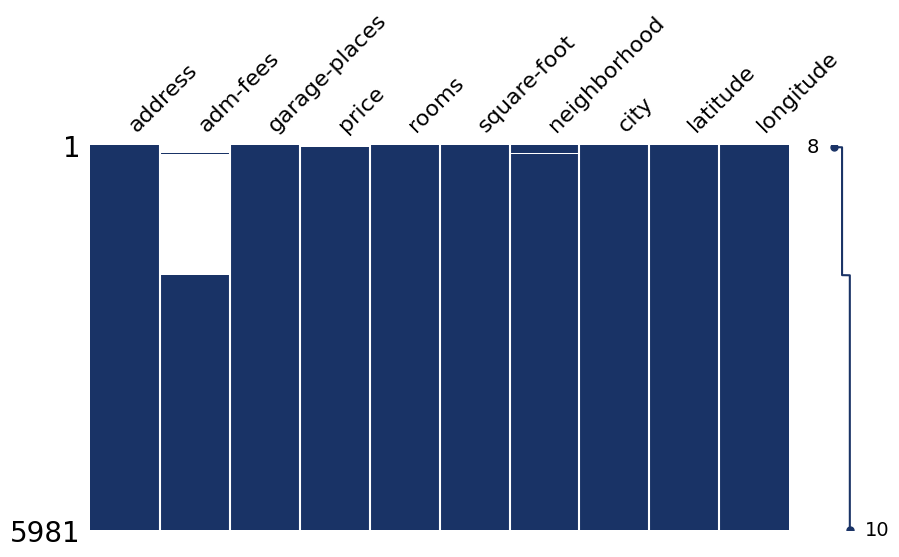

In [ ]:
# gráfico de valores ausentes
missingno.matrix(df, figsize = (10,5),  color=(0.1, 0.2, 0.4), sort="ascending");

# **Limpeza de Dados Ausentes**

Quanto à coluna `taxa_condominio`, considerando ser uma variável quantitativa, poderia optar pelo preenchimento dos valores faltantes com a mediana. Contudo, essa abordagem não seria apropriada, uma vez que a ausência de dados se deve à inexistência de taxa de condomínio no imóvel. Por essa razão, optei por remover essa coluna do conjunto de dados.

In [ ]:
# criar uma cópia do dataframe original
df_hk = df.copy()

# excluir colunas com dados faltantes
df_hk.drop(columns=['taxa_condominio', 'cidade', 'longitude','latitude'], inplace=True)

À respeito da coluna `preco`, como se trata de uma variável quantitativa, irei preencher os valores ausentes com a mediana.

In [ ]:
# verificar a mediana de preco
med_reviews = df_hk.preco.median()
print("A mediana de preço é {}. " .format(med_reviews))

A mediana de preço é 680000.0. 


In [ ]:
# preencher as informações faltantes com a mediana
df_hk = df_hk.fillna({'preco':med_reviews})

Vamos analisar os resultados após a conclusão da limpeza.

In [ ]:
# verificar dados ausentes
(df_hk.isnull().sum()).sort_values(ascending=False)

bairro          24
endereco         0
vaga_garagem     0
preco            0
quartos          0
area             0
cidade           0
latitude         0
longitude        0
dtype: int64

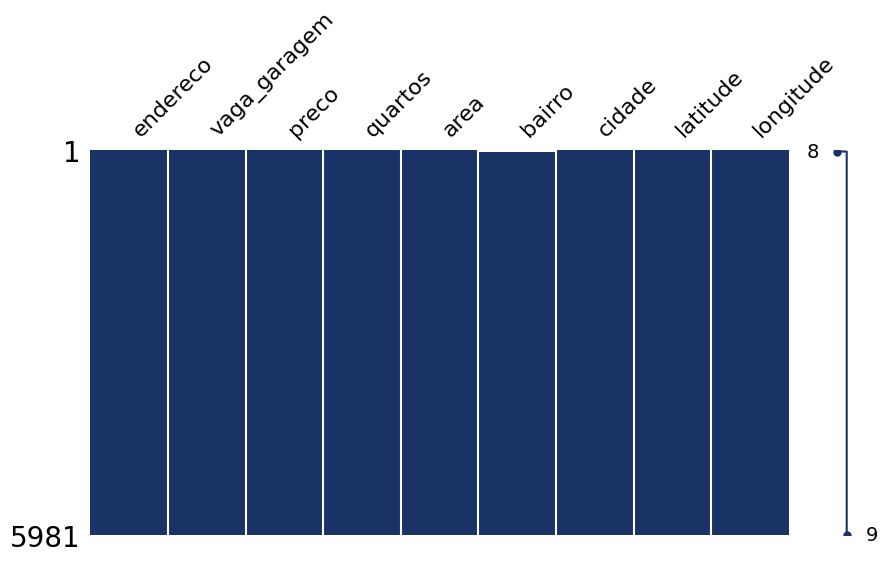

In [ ]:
# gráfico de valores ausentes
missingno.matrix(df_hk, figsize = (10,5), color=(0.1, 0.2, 0.4), sort="ascending");

In [ ]:
df

,endereco,taxa_condominio,vaga_garagem,preco,quartos,area,bairro,cidade,latitude,longitude
0,"Avenida Raja Gabaglia, 1583",470.0,1,330000.0,1,40,Luxemburgo,Belo Horizonte,-19.936415,-43.953396
1,"Rua Espírito Santo, 1171",NaN,1,480000.0,2,45-65,Centro,Belo Horizonte,-18.864776,-41.121777
2,"Rua dos Expedicionários, 1082",NaN,5,1190000.0,4,411,Santa Amélia,Belo Horizonte,-20.225241,-44.397780
3,"Rua Marechal Hermes, 81",750.0,4,1590000.0,4,158,Gutierrez,Belo Horizonte,-19.937155,-43.958694
4,"Rua Juruna, 110",NaN,6,550000.0,3,278,Pindorama,Belo Horizonte,-19.912982,-44.019944
...,...,...,...,...,...,...,...,...,...,...
5976,Rua Gama Cerqueira,340.0,2,560000.0,3,92,Nova Suíssa,Belo Horizonte,-19.945428,-43.970988
5977,"Rua Arthur Lourenço, 262",200.0,1,440000.0,3,90,Barreiro,Belo Horizonte,-19.979915,-44.026007
5978,Rua General Ephigênio Ruas Santos,10.0,2,500000.0,3,80,Itapoã,Belo Horizonte,-19.840904,-43.956037
5979,Rua General Ephigênio Ruas Santos,10.0,2,740000.0,3,80,Itapoã,Belo Horizonte,-19.840904,-43.956037
